# Explorative Datenanalyse
Die Daten werden analysiert und visuell dargestellt

#### Allgemeines Setup des Notebooks

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from pandas import read_csv
from sklearn.utils import shuffle
from datetime import datetime
from pandas.core.computation.check import NUMEXPR_INSTALLED
import seaborn as sns

### 1.0 Daten werden geladen

In [55]:
#Laden der bereinigten Daten
df_concat_data = pd.read_pickle('../resources/CleanedDataWithIds.pkl')
df_cleaned_data = pd.read_pickle('../resources/CleanedDataWithoutChange.pkl')

#Extraction in zwei Dataframes
df_einfach_final = df_concat_data.loc[df_concat_data['siteName'] == 0]
df_schwer_final = df_concat_data.loc[df_concat_data['siteName'] == 1]

### 2.0 Explorative Datenanalyse

##### 2.1 Kategorische Daten, Numerische Daten oder NaN
Nun wird nochmal der Datensatz betrachtet ohne gelöschte Scroll-Daten um herauszufinden, welche Merkmale numerisch oder kategorisch einzuordnen sind

In [56]:
def utils_recognize_type(df_cleaned_data_, col, max_cat=20):
    if (df_cleaned_data[col].dtype == "TestEinfach") | (df_cleaned_data[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

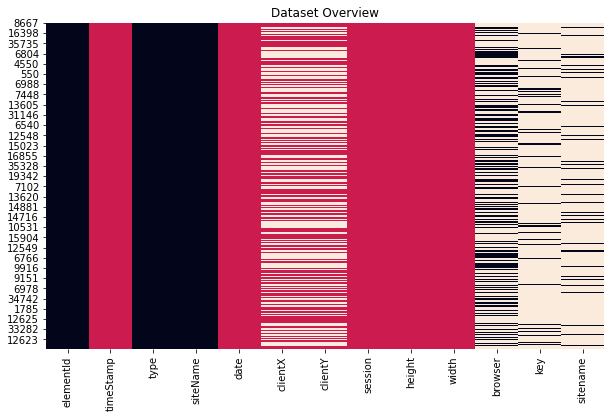

 Categerocial   Numeric   NaN 


In [57]:
dic_cols = {col:utils_recognize_type(df_cleaned_data, col, max_cat=20) for col in df_cleaned_data.columns}
heatmap = df_cleaned_data.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

##### 2.2 Anzahl der Events mit der Zeit
Hier wird die zeitliche Dimension der Events betrachtet, insbesondere zu welchem Zeitpunkt die jeweiligen Events stattgefunden haben. Dabei wird wieder der Datensatz mit den gelöschten Scroll-Interaktionen betrachtet.

/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ingaglotzbach/opt

<AxesSubplot: xlabel='timeStamp', ylabel='type'>

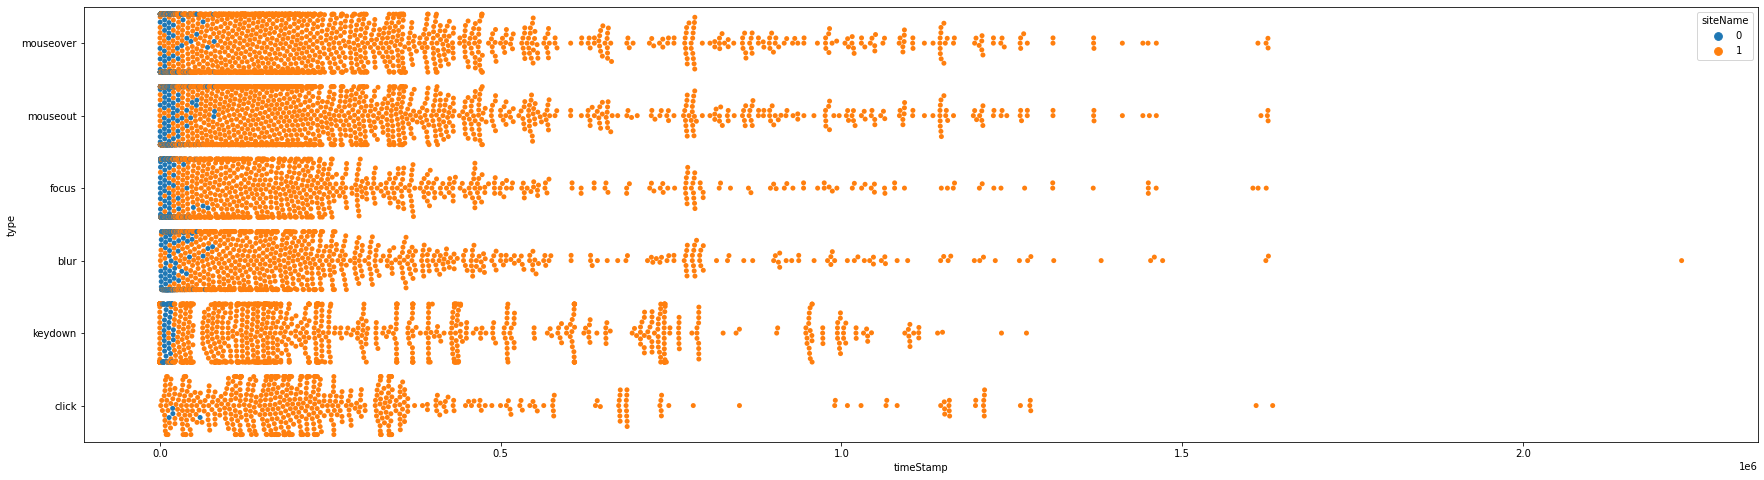

In [58]:
fig2 = plt.subplots(1, figsize=(30,8), sharey=True)
sns.swarmplot(data=df_concat_data, x='timeStamp', y='type', hue="siteName")

[Text(0.5, 1.0, 'Schwere Seite')]

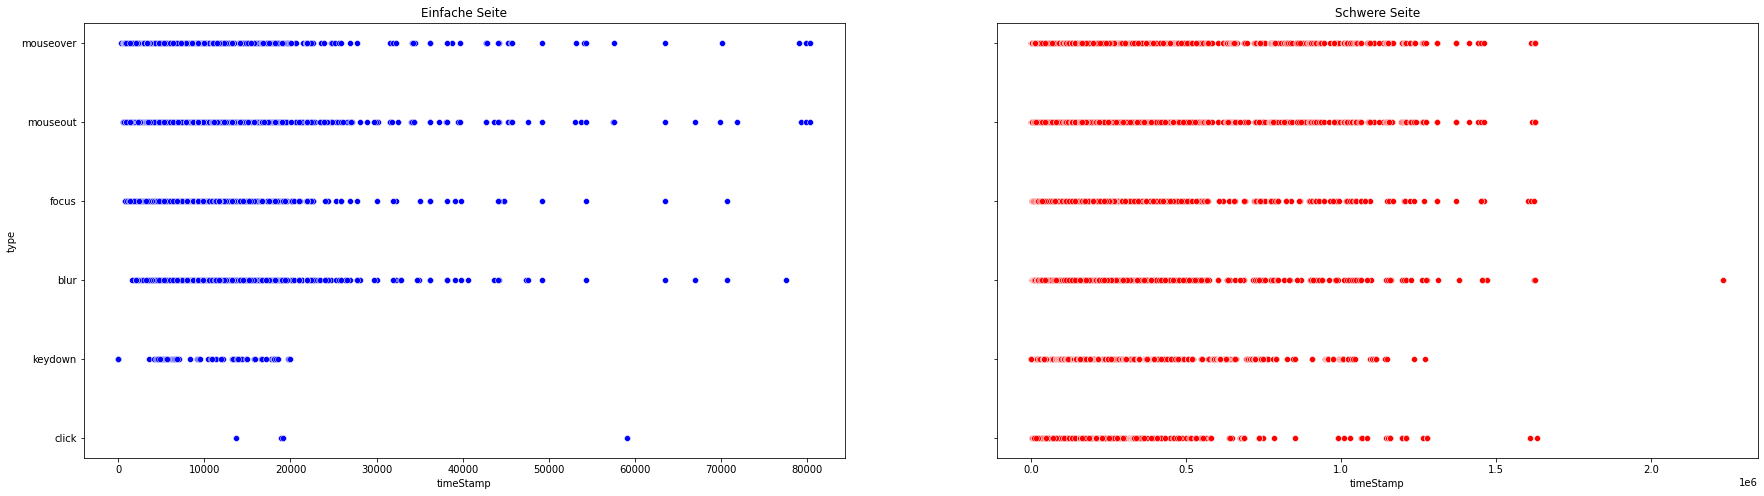

In [59]:
fig3, ax3 = plt.subplots(1,2,figsize=(30,8), sharey=True)

sns.scatterplot(data=df_einfach_final, x='timeStamp', y='type', ax=ax3[0], color='blue').set(title='Einfache Seite')
sns.scatterplot(data=df_schwer_final, x='timeStamp', y='type', ax=ax3[1], color='red').set(title='Schwere Seite')

In [60]:
df_schwer_final = df_schwer_final.sort_values(['type'])
df_einfach_final = df_einfach_final.sort_values(['type'])

##### 2.2 Untersuchung der Types je nach Seite

[Text(0.5, 1.0, 'Schwere Seite')]

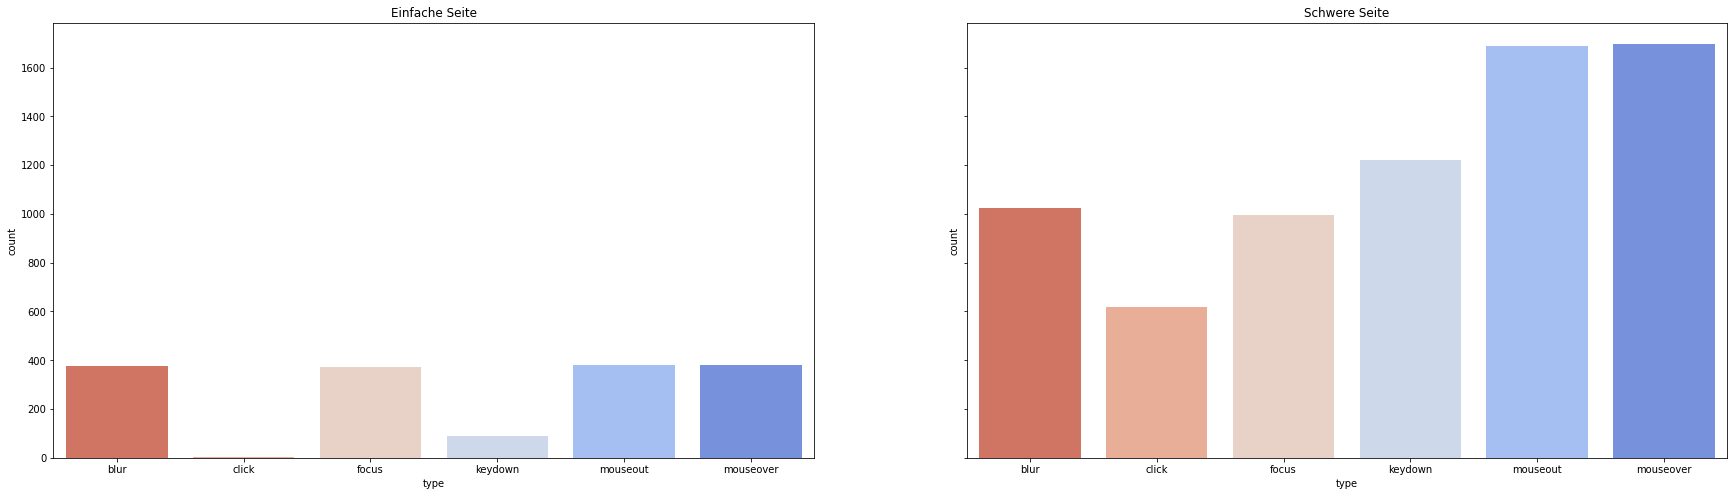

In [61]:
fig2, axs2 = plt.subplots(1,2, figsize=(30,8), sharey=True)

# Count plot
sns.countplot(x = 'type', data = df_einfach_final, palette="coolwarm_r", ax=axs2[0]).set(title='Einfache Seite')
sns.countplot(x = 'type', data = df_schwer_final, palette="coolwarm_r", ax=axs2[1]).set(title='Schwere Seite')

#### 2.4 Durschnittszeiten pro Seite 
Die Datenstruktur wurde in '03_SortiertNachSessions' verändert

In [62]:
df_sessions = pd.read_pickle('../resources/SortedBySessions.pkl')
df_einfach_final = df_sessions.loc[df_sessions['siteName'] == 0]
df_schwer_final = df_sessions.loc[df_sessions['siteName'] == 1]
df_schwer_final['duration'].describe()

count      59.000000
mean      264.217492
std       297.288773
min         6.188000
25%        72.288000
50%       210.760000
75%       338.699000
max      1629.802000
Name: duration, dtype: float64

In [63]:
df_einfach_final['duration'].describe()

count    61.000000
mean     22.127492
std      13.002851
min       5.325000
25%      16.278000
50%      18.372000
75%      24.522000
max      79.181000
Name: duration, dtype: float64

##### 2.5 Erfolgsquote der Aufgabe anhand des Weiter-Buttons

In [85]:
df_einfach_final = df_concat_data.loc[df_concat_data['siteName'] == 0]
df_schwer_final = df_concat_data.loc[df_concat_data['siteName'] == 1]

df_test = df_einfach_final.loc[df_einfach_final['elementId'] == 'nextButton']
print('Anzahl der Next-Button-Events auf der einfachen Seite:', (len(df_test)))

Anzahl der Next-Button-Events auf der einfachen Seite: 4


In [87]:
df_test = df_schwer_final.loc[df_schwer_final['elementId'] == 'clickHere']
print('Anzahl der Next-Button-Events auf der schwere Seite:',(len(df_test)))

Anzahl der Next-Button-Events auf der schwere Seite: 21


In [93]:
df_test = df_schwer_final.loc[df_schwer_final['elementId'] == 'nextButton']
print('Anzahl der Next-Button-Events auf der schwere Seite:', len(df_test))

Anzahl der Next-Button-Events auf der schwere Seite: 490


In [96]:
print(df_test['session'].value_counts())

995    63
695    43
813    33
569    25
758    24
759    23
395    20
419    18
927    18
205    18
949    18
359    17
112    12
254    10
608     9
371     9
239     9
976     8
524     8
285     7
515     7
898     7
196     6
439     6
297     6
749     6
245     5
896     5
921     4
440     4
934     4
680     4
136     4
253     3
201     3
472     3
574     3
408     2
388     2
260     2
360     2
634     2
102     2
889     2
227     1
389     1
368     1
867     1
Name: session, dtype: int64


#### 2.6 Benutzerfehlerquote

In [98]:
df_einfach_final['type'].value_counts()

mouseover    380
mouseout     379
blur         375
focus        374
keydown       91
click          4
Name: type, dtype: int64

In [99]:
df_schwer_final['type'].value_counts()

mouseover    1698
mouseout     1688
keydown      1219
blur         1024
focus         997
click         618
Name: type, dtype: int64

### 3.2 Korrelationsmatrix

Bevor die Korrelationsmatrix verwendet werden kann, müssen alle kategorischen Daten in numerische Werte umgewandelt werden

In [64]:
one_hot_encoded_data = pd.get_dummies(df_concat_data, columns = ['type'])
one_hot_encoded_data = one_hot_encoded_data.drop(['elementId'], axis=1)

In [65]:
one_hot_encoded_data.corr()

<ipython-input-65-579b4a4dc715>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  one_hot_encoded_data.corr()


,timeStamp,siteName,clientX,clientY,session,height,width,type_blur,type_click,type_focus,type_keydown,type_mouseout,type_mouseover
timeStamp,1.000000,0.329996,0.036988,0.210926,0.196943,0.034366,0.104407,-0.053051,0.069092,-0.058207,0.039581,0.015062,0.005484
siteName,0.329996,1.000000,0.188070,0.420133,0.068294,0.143694,0.116168,-0.097732,0.124770,-0.101843,0.120929,-0.003105,-0.002412
clientX,0.036988,0.188070,1.000000,0.286275,0.055500,0.431011,0.492302,-0.018186,0.023633,-0.018963,0.022981,0.005494,-0.007150
clientY,0.210926,0.420133,0.286275,1.000000,0.112796,0.259546,0.218314,-0.040977,0.052492,-0.042705,0.050909,0.006574,-0.009149
session,0.196943,0.068294,0.055500,0.112796,1.000000,0.187997,0.226192,-0.033864,0.030758,-0.028265,-0.047139,0.038103,0.036186
height,0.034366,0.143694,0.431011,0.259546,0.187997,1.000000,0.824583,-0.076300,0.029663,-0.043641,-0.053632,0.054306,0.075762
width,0.104407,0.116168,0.492302,0.218314,0.226192,0.824583,1.000000,-0.071240,0.029691,-0.063744,-0.054089,0.073298,0.069976
type_blur,-0.053051,-0.097732,-0.018186,-0.040977,-0.033864,-0.076300,-0.071240,1.000000,-0.119184,-0.185598,-0.180686,-0.239301,-0.240132
type_click,0.069092,0.124770,0.023633,0.052492,0.030758,0.029663,0.029691,-0.119184,1.000000,-0.117764,-0.114647,-0.151839,-0.152366
type_focus,-0.058207,-0.101843,-0.018963,-0.042705,-0.028265,-0.043641,-0.063744,-0.185598,-0.117764,1.000000,-0.178534,-0.236450,-0.237271


##### 3.2.1 Erste Korrelationsmatrix mit einzelnen Events als Row

<ipython-input-66-3c0ada8556f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(one_hot_encoded_data.corr(), vmin=-1, vmax=1, annot=True)


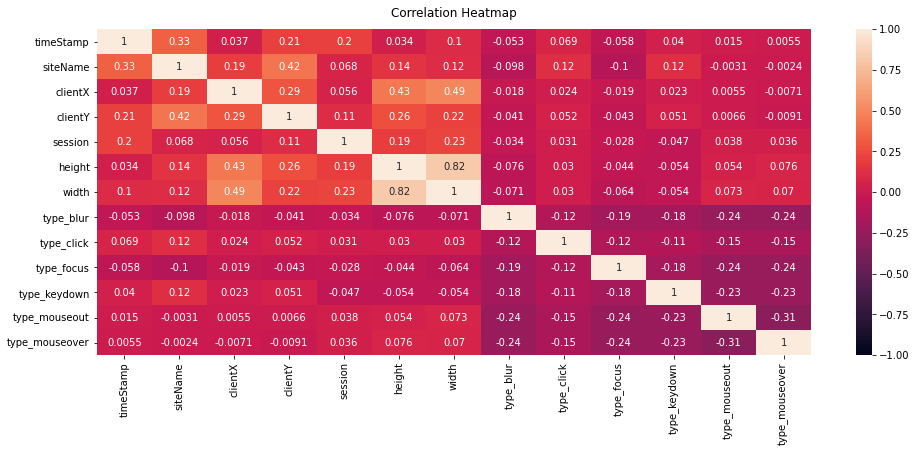

In [66]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(one_hot_encoded_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

##### 3.2.2 Zweite Korrelationsmatrix mit Sessions als Row

In [67]:
df_sessions = pd.read_pickle('../resources/SortedBySessions.pkl')
one_hot_encoded_data_sessions = pd.get_dummies(df_sessions, columns = ['siteName'])

In [68]:
df_sessions.head()

,session,count_mouseover,count_mouseout,count_click,count_blur,count_focus,count_keydown,duration,height,width,siteName
0,515,32,32,14,26,28,27,136.831,1312.0,1479.0,1
1,519,1,0,0,1,1,0,33.249,669.0,390.0,1
2,524,42,42,8,17,16,5,230.175,878.0,1920.0,1
3,528,4,3,0,6,6,0,20.563,1217.0,1440.0,0
4,554,6,6,0,6,6,0,17.076,715.0,414.0,0


In [69]:
one_hot_encoded_data_sessions.corr()

,session,count_mouseover,count_mouseout,count_click,count_blur,count_focus,count_keydown,duration,height,width,siteName_0,siteName_1
session,1.000000,0.185343,0.186416,0.184452,0.145906,0.153380,0.053493,0.016331,0.132333,0.050573,0.117198,-0.117198
count_mouseover,0.185343,1.000000,0.999953,0.678188,0.926356,0.932775,0.740002,0.690807,0.188989,0.219447,-0.371347,0.371347
count_mouseout,0.186416,0.999953,1.000000,0.678011,0.925720,0.932279,0.738296,0.689657,0.190539,0.222031,-0.368353,0.368353
count_click,0.184452,0.678188,0.678011,1.000000,0.721590,0.720849,0.515800,0.546350,0.127816,0.190296,-0.493140,0.493140
count_blur,0.145906,0.926356,0.925720,0.721590,1.000000,0.998622,0.828719,0.745088,0.111897,0.095567,-0.400694,0.400694
count_focus,0.153380,0.932775,0.932279,0.720849,0.998622,1.000000,0.825388,0.749911,0.121113,0.106742,-0.388754,0.388754
count_keydown,0.053493,0.740002,0.738296,0.515800,0.828719,0.825388,1.000000,0.721591,0.068969,0.053875,-0.393458,0.393458
duration,0.016331,0.690807,0.689657,0.546350,0.745088,0.749911,0.721591,1.000000,0.039912,0.048591,-0.504944,0.504944
height,0.132333,0.188989,0.190539,0.127816,0.111897,0.121113,0.068969,0.039912,1.000000,0.756326,0.055858,-0.055858
width,0.050573,0.219447,0.222031,0.190296,0.095567,0.106742,0.053875,0.048591,0.756326,1.000000,0.001723,-0.001723


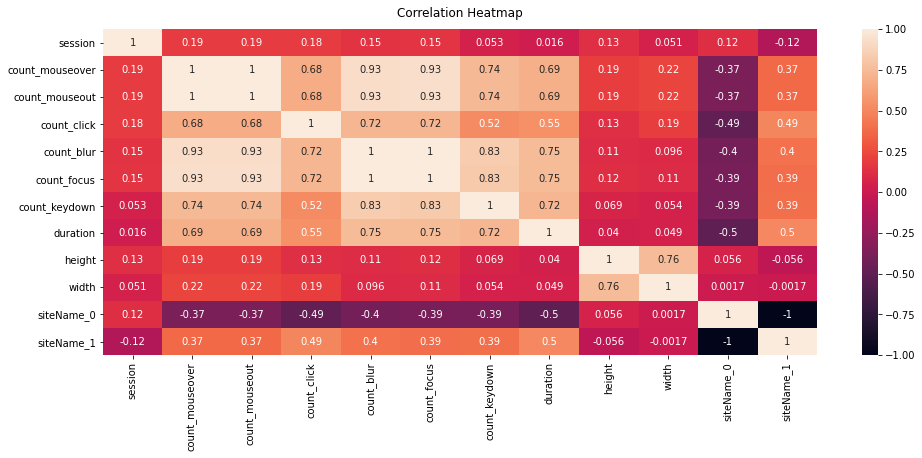

In [70]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(one_hot_encoded_data_sessions.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### 3.4 Pairplot zur Darstellung von Korrelationen

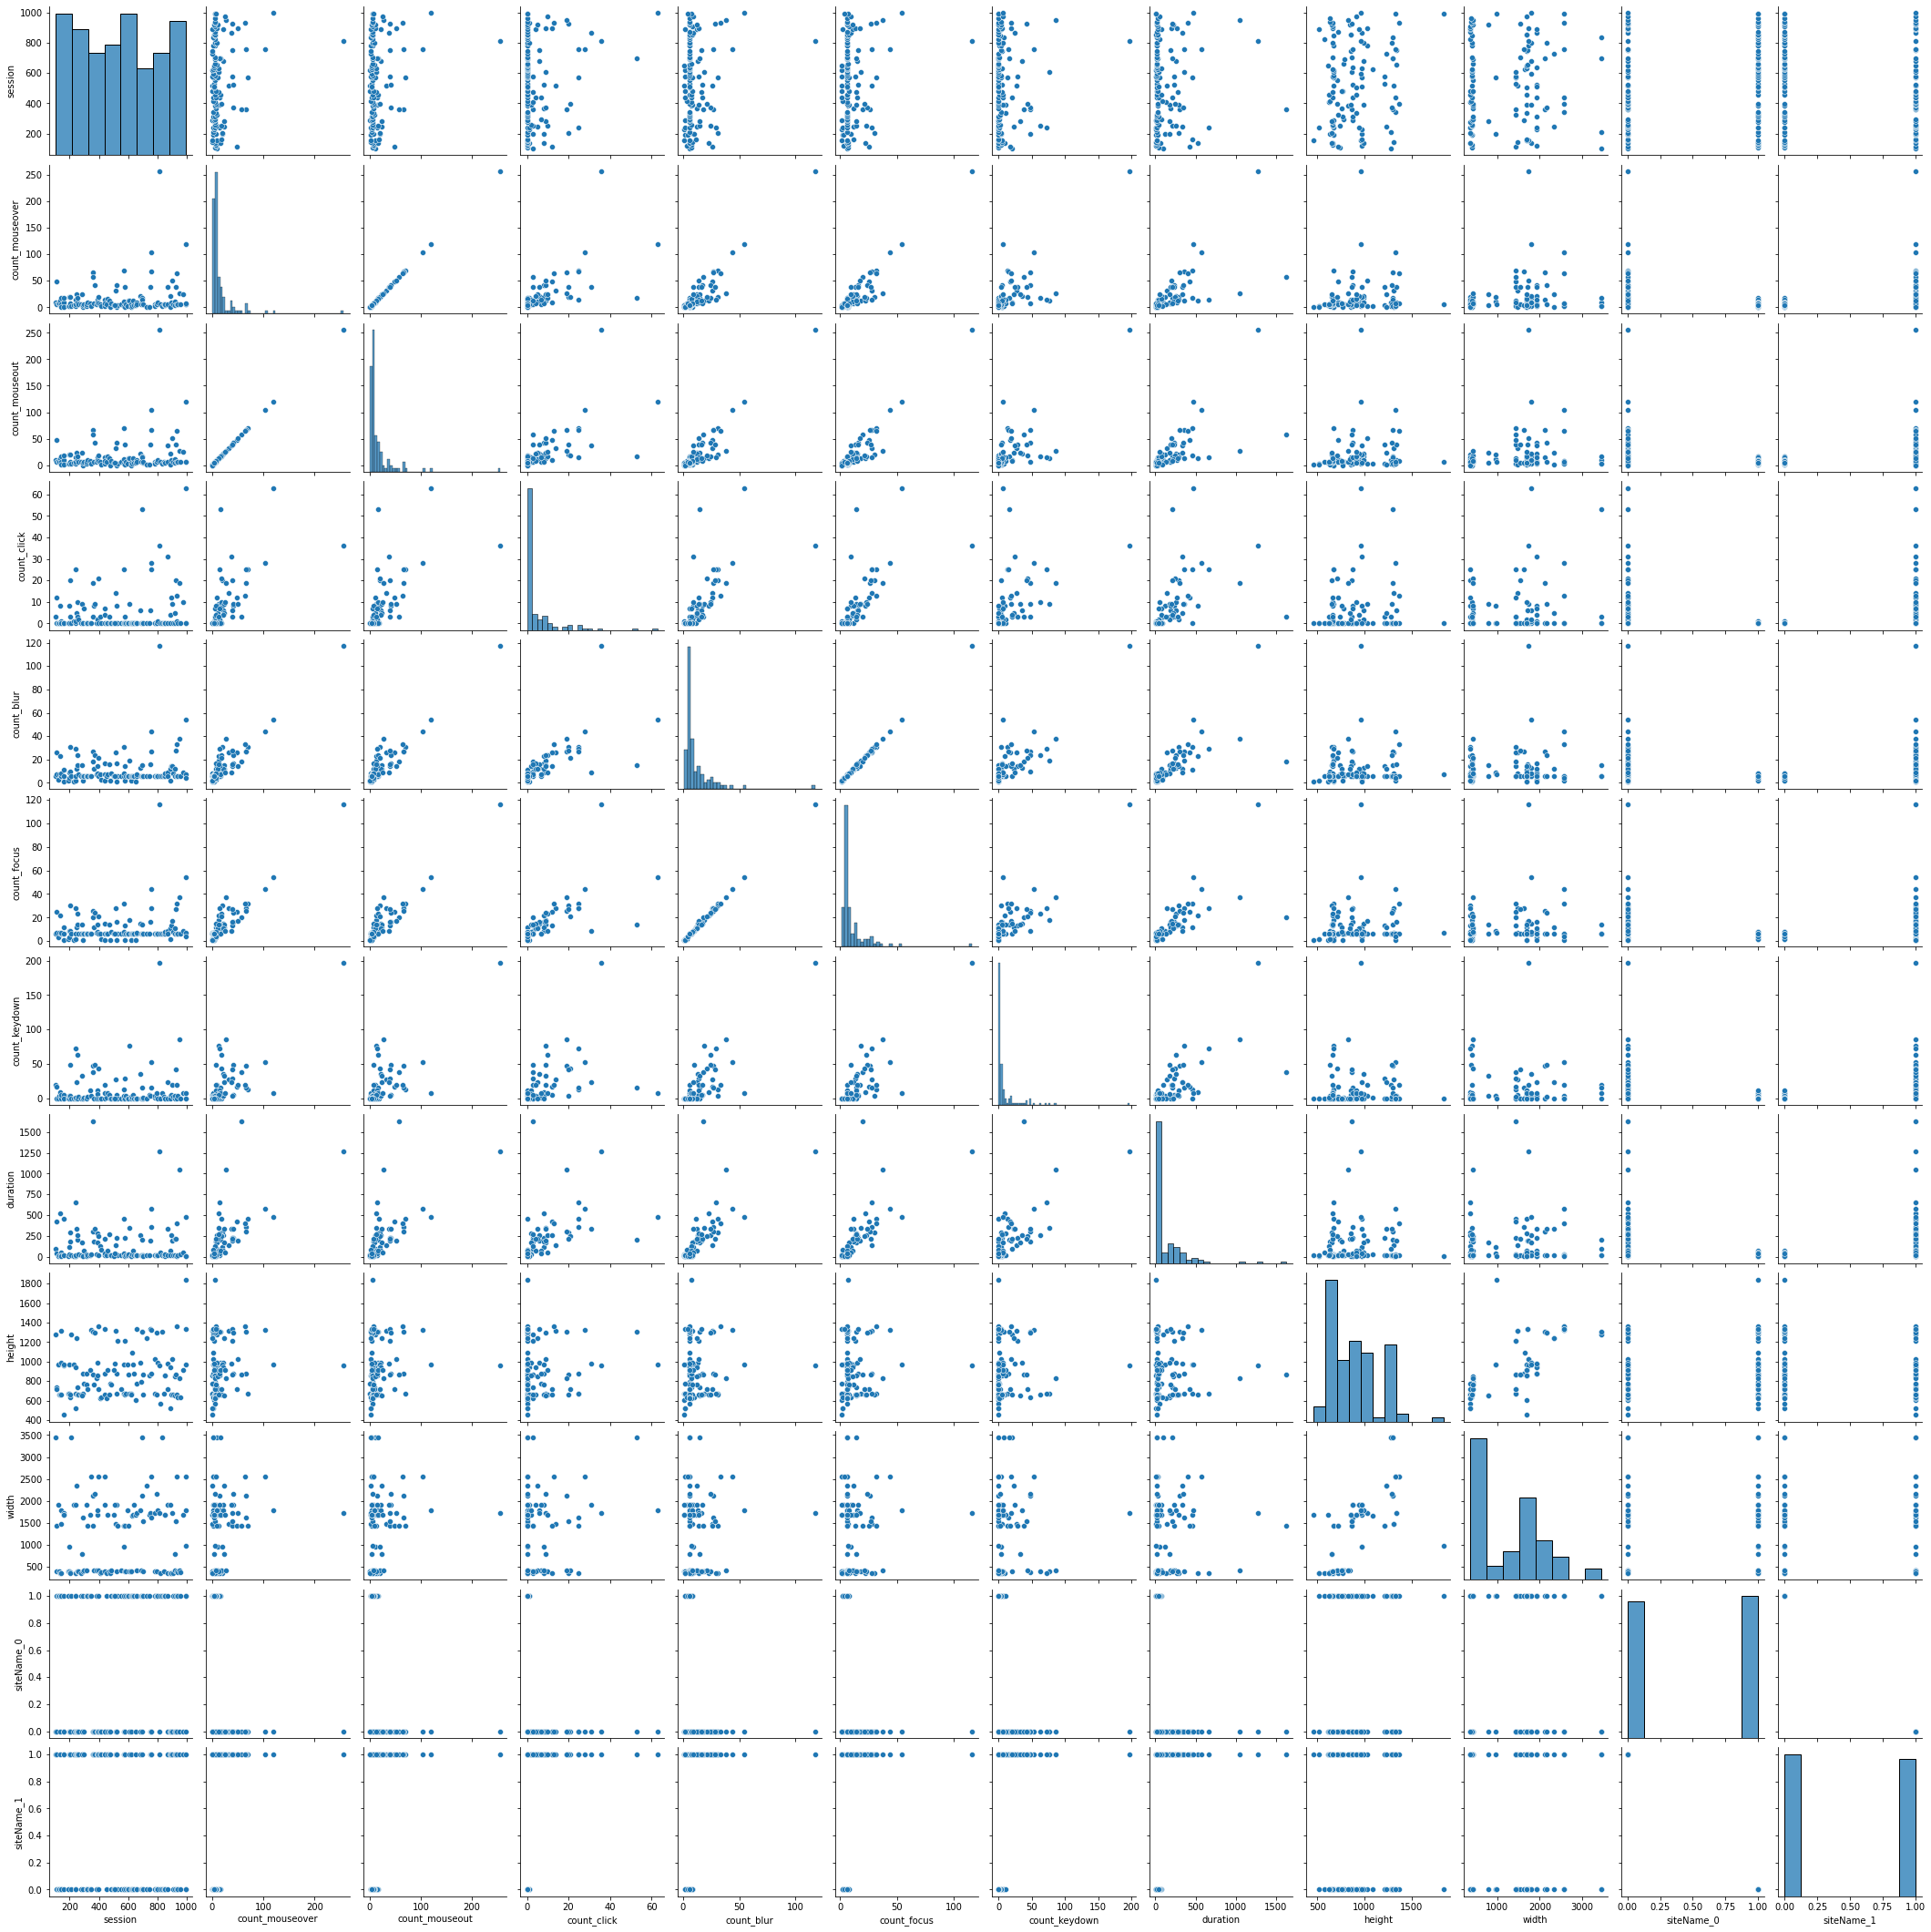

In [71]:
sns.pairplot(one_hot_encoded_data_sessions)